In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns

In [40]:
# loads all parts of the clean canadiens data sets and turns them into 1 dataframe 
df1 = pd.read_csv('./data/canada_all_df_pt1.csv')
df2 = pd.read_csv('./data/canada_all_df_pt2.csv')
df3 = pd.read_csv('./data/canada_all_df_pt3.csv')
df4 = pd.read_csv('./data/canada_all_df_pt4.csv')
df5 = pd.read_csv('./data/canada_all_df_pt5.csv')
df6 = pd.read_csv('./data/canada_all_df_pt6.csv')
df7 = pd.read_csv('./data/canada_all_df_pt7.csv')
df8 = pd.read_csv('./data/canada_all_df_pt8.csv')
df9 = pd.read_csv('./data/canada_all_df_pt9.csv')
df10 = pd.read_csv('./data/canada_all_df_pt10.csv')
df11 = pd.read_csv('./data/canada_all_df_pt11.csv')
df12 = pd.read_csv('./data/canada_all_df_pt12.csv')
df13 = pd.read_csv('./data/canada_all_df_pt13.csv')
df14 = pd.read_csv('./data/canada_all_df_pt14.csv')
df15 = pd.read_csv('./data/canada_all_df_pt15.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15])

In [22]:
df

Stn_Name     Lat     Long Prov    Tm  DwTm    Tx  DwTx  \
0                 ABITIBI POST  48.717  -79.367   QC -19.6   0.0   1.7   0.0   
1                  AGASSIZ CDA  49.243 -121.760   BC   0.3   0.0   8.9   0.0   
2         ALBERNI BEAVER CREEK  49.367 -124.933   BC   0.5   0.0   9.4   0.0   
3                    ALERT BAY  50.583 -126.933   BC   3.2   0.0   8.9   0.0   
4                         ALIX  52.383 -113.167   AB -15.4   0.0   6.7   0.0   
...                        ...     ...      ...  ...   ...   ...   ...   ...   
121995                   YOHIN  61.242 -123.742   NT -16.1  16.0  12.5  15.0   
121996               YOHO PARK  51.443 -116.345   BC -14.6   0.0  -1.8   0.0   
121997                 YORKTON  51.265 -102.464   SK -13.3   0.0   4.2   0.0   
121998                 YORKTON  51.265 -102.462   SK -13.7   3.0   4.1   3.0   
121999  ZEBALLOS MURAUDE CREEK  50.053 -126.779   BC   3.4   0.0  16.5   0.0   

          Tn  DwTn          S       DwS         P  DwP      Pd     HDD  CDD  \
0      -38.3   0.0  22.900000  0.000000   22.9000  0.0   5.000  1164.5  0.0   
1      -18.3   0.0  82.600000  0.000000  256.5000  0.0  20.000   549.4  0.0   
2      -16.7   0.0  63.400000  0.000000  136.1000  0.0  13.000   542.1  0.0   
3      -11.1   0.0  40.600000  0.000000  186.0000  0.0  21.000   460.1  0.0   
4      -47.2   0.0  40.200000  0.000000   42.0000  0.0   9.000  1036.2  0.0   
...      ...   ...        ...       ...       ...  ...     ...     ...  ...   
121995 -39.5   9.0  10.256098  0.560976   10.1575  0.1   3.525   510.9  0.0   
121996 -34.4   0.0   0.000000  0.000000   10.8000  0.0   4.000  1010.2  0.0   
121997 -35.9   0.0   9.900000  0.000000    8.2000  0.0   3.000   969.7  0.0   
121998 -35.5   3.0   9.900000  0.000000    0.0000  3.0   0.000   887.3  0.0   
121999  -5.0   0.0   0.000000  0.000000  105.1000  0.0  10.000   451.8  0.0   

        Clim_ID  Year  Month  
0       7090050  1917      1  
1       1100120  1917      1  
2       1030180  1917      1  
3       1020270  1917      1  
4       3020120  1917      1  
...         ...   ...    ...  
121995  2204300  2017     12  
121996  11790J1  2017     12  
121997  4019073  2017     12  
121998  4019075  2017     12  
121999  1039035  2017     12  

[1522001 rows x 20 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1522001 entries, 0 to 121999
Data columns (total 20 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Stn_Name  1522001 non-null  object 
 1   Lat       1522001 non-null  float64
 2   Long      1522001 non-null  float64
 3   Prov      1522001 non-null  object 
 4   Tm        1522001 non-null  float64
 5   DwTm      1522001 non-null  float64
 6   Tx        1522001 non-null  float64
 7   DwTx      1522001 non-null  float64
 8   Tn        1522001 non-null  float64
 9   DwTn      1522001 non-null  float64
 10  S         1522001 non-null  float64
 11  DwS       1522001 non-null  float64
 12  P         1522001 non-null  float64
 13  DwP       1522001 non-null  float64
 14  Pd        1522001 non-null  float64
 15  HDD       1522001 non-null  float64
 16  CDD       1522001 non-null  float64
 17  Clim_ID   1522001 non-null  object 
 18  Year      1522001 non-null  int64  
 19  Month     1522001 non-

In [42]:
df['decade'] = df['Year']//10 *10


df['decade'] = df['decade'].astype(str)

In [44]:
X= df.drop(columns= ['Stn_Name', 'Prov', 'Clim_ID', 'decade', 'Year'])
y = df['decade']

X_train, X_test,y_train,y_test = train_test_split(X,y, stratify=y)

In [45]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_sc,y_train)
logreg.score(X_train_sc,y_train), logreg.score(X_test_sc,y_test)

(0.18439421813403417, 0.18395746660324153)

In [46]:
# makes a new column that called decade. The value reflects how many decades the after 1910 the data was recorded  

dec ={'1910':0, '1920':1, '1930':2, '1940':3, '1950':4, '1960':5, '1970':6, '1980':7,
       '1990':8, '2000':9, '2010':10}

df['decade']=   df['decade'].map(dec)

In [47]:
# Makes the dataframe contain only stations with more than 30 years worth of observations



# https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts


df = df.groupby("Clim_ID").filter(lambda x: len(x) > 360)

In [48]:
df.groupby('decade')['Tx'].mean()

decade
0     19.044731
1     19.169625
2     19.686885
3     19.265519
4     18.353348
5     18.081801
6     18.016402
7     18.413280
8     18.520180
9     18.596833
10    18.707006
Name: Tx, dtype: float64

In [49]:
df.groupby('decade')['Tm'].mean()

decade
0     3.741520
1     4.082320
2     4.232980
3     4.050603
4     3.515073
5     3.254223
6     3.150632
7     3.682726
8     3.903150
9     4.034551
10    5.000025
Name: Tm, dtype: float64

In [50]:
df.groupby('decade')['Tn'].mean()

decade
0    -12.243386
1    -11.465825
2    -11.311280
3    -11.314401
4    -11.423834
5    -11.384293
6    -11.696359
7    -11.105070
8    -10.734559
9    -10.216360
10    -8.698658
Name: Tn, dtype: float64

In [51]:
df.groupby('decade')['S'].mean()

decade
0     14.454628
1     13.811432
2     14.176337
3     14.399229
4     15.504845
5     15.702439
6     17.206120
7     14.435761
8     15.444507
9     15.137634
10    13.717407
Name: S, dtype: float64

In [52]:
df.groupby('decade')['P'].mean()

decade
0     61.223369
1     60.751719
2     62.284533
3     63.224294
4     66.164205
5     66.642649
6     70.009593
7     71.688886
8     74.433315
9     71.369886
10    75.801976
Name: P, dtype: float64

In [53]:
df.groupby('decade')['HDD'].mean()

decade
0     435.222577
1     424.920246
2     428.054236
3     431.344662
4     439.857474
5     448.666978
6     453.522962
7     435.206074
8     426.650199
9     420.007620
10    362.721886
Name: HDD, dtype: float64

In [54]:
df.groupby('decade')['CDD'].mean()

decade
0     9.407162
1     9.343709
2     9.334205
3     8.908345
4     8.727538
5     8.582180
6     8.611628
7     8.474207
8     8.186221
9     7.977527
10    8.181028
Name: CDD, dtype: float64

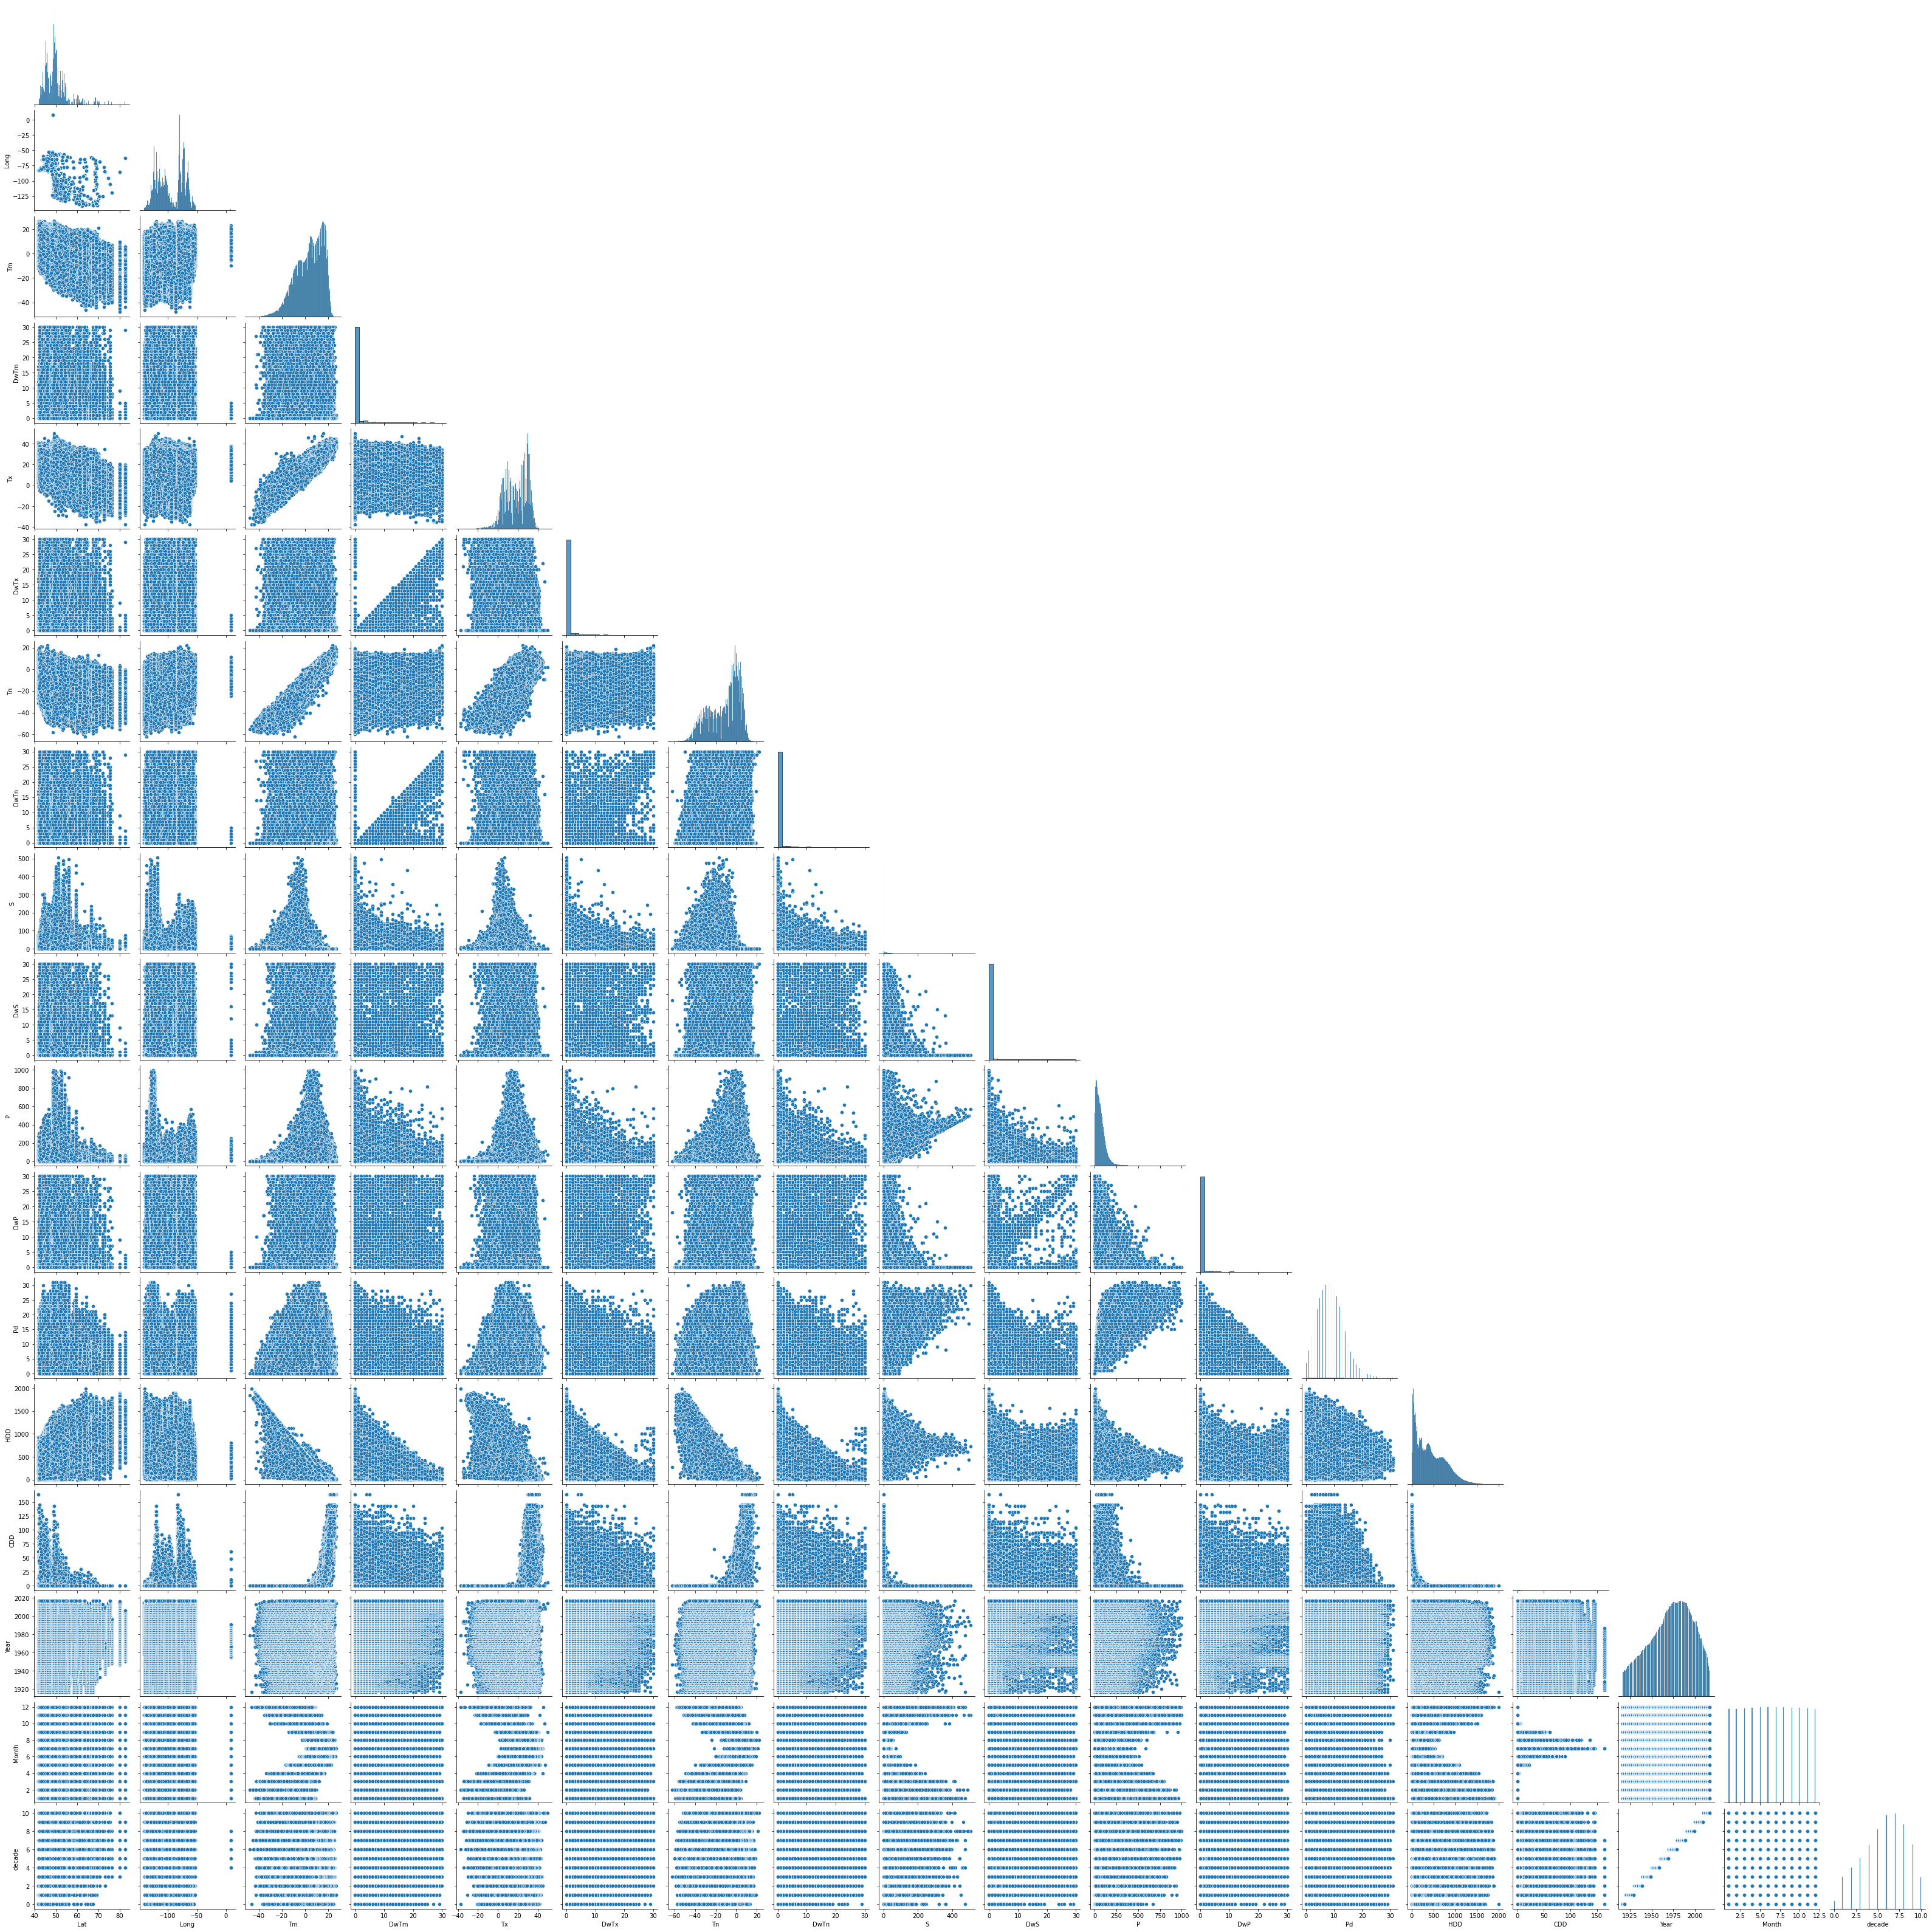

In [55]:
sns.pairplot(df,corner=True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

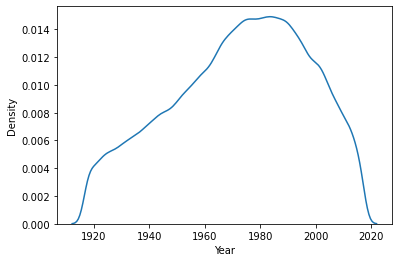

In [56]:
sns.kdeplot(df['Year'])